For a mass-spring system, we have two coupled differential equations representing the system's position $x$ and velocity $v$:

$$\frac{dx}{dt} = v$$
$$\frac{dv}{dt} = -\frac{k}{m} x$$

Where $k$ is the spring constant and $m$ is the mass.

A closed-form solution for this system is given by:

$$x(t) = A \cos(\omega t + \phi)$$

$$v(t) = -A \omega \sin(\omega t + \phi)$$

Where $\omega = \sqrt{\frac{k}{m}}$ is the angular frequency, $A$ is the amplitude, and $\phi$ is the phase.


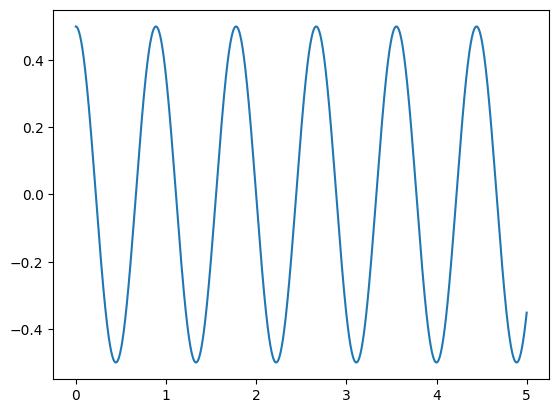

In [1]:
import numpy as np
import matplotlib.pyplot as plt

K_CONSTANT = 50
MASS = 1
AMPLITUDE = 0.5
PHASE = 0

END_TIME = 5

time = np.arange(0, END_TIME, 0.001)

def ground_truth(time):
    return AMPLITUDE * np.cos(np.sqrt(K_CONSTANT / MASS) * time + PHASE)

ground_truth_position = ground_truth(time)

plt.plot(time, ground_truth_position)

# Explicit Forward Euler Method

The most straightforward way to solve a differential equation numerically is to use the explicit forward Euler method. This method approximates the derivative of a function by the slope of a line between two points.

Given a function $f(t, x)$ and a time step size $h$, the forward Euler method iterates as follows:

$$x_{n+1} = x_n + h f(t_n, x_n)$$

Where $f(t_n, x_n)$ represents the derivative of $x$ with respect to $t$ at the point $(t_n, x_n)$.

For the mass-spring system, we can use the forward Euler method to approximate the position and velocity at each time step. The equations for the forward Euler method are:

$$x_{i+1} = x_i + h * v_i$$
$$v_{i+1} = v_i - h * \frac{k}{m} x_i$$

Where $x_i$ and $v_i$ are the position and velocity at time $t_i$, and $x_{i+1}$ and $v_{i+1}$ are the position and velocity at time $t_{i+1} = t_i + h$.

Text(0.5, 1.0, 'Explicit Euler method with different time steps')

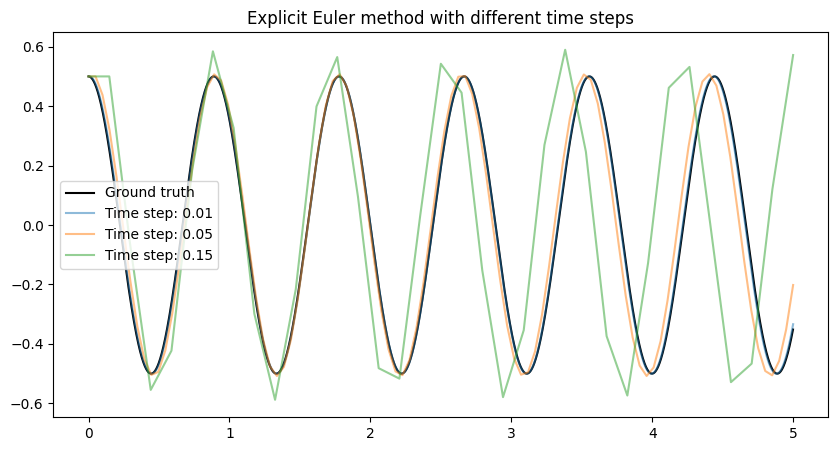

In [2]:
def explicit_euler(time_step, end_time, start_position, start_velocity):
    current_position = start_position
    current_velocity = start_velocity
    positions = [current_position]
    time = 0
    while time < end_time:
        current_position = current_position + (time_step * current_velocity)
        current_velocity = current_velocity - (time_step * (K_CONSTANT / MASS) * current_position)
        time += time_step
        positions.append(current_position)

    return positions

time_steps = [0.01, 0.05, 0.15]
plt.figure(figsize=(10, 5))
plt.plot(time, ground_truth_position, label="Ground truth", color="black")
for time_step in time_steps:
    explicit_euler_positions = explicit_euler(time_step, END_TIME, AMPLITUDE, 0)
    step_count = len(explicit_euler_positions)
    plt.plot(np.linspace(0, END_TIME, step_count), explicit_euler_positions, label=f"Time step: {time_step}", alpha=0.5)
plt.legend()
plt.title("Explicit Euler method with different time steps")
        

# Implicit Backward Euler Method

To better account for the stability of the system, we can use the implicit Euler method. It involves looking into the future to calculate the next state.

$$x_{n+1} = x_n + h f(t_{n+1}, x_{n+1})$$

For the mass-spring system, where $f(t, x) = v$ and $f(t, v) = -\frac{k}{m} x$, the implicit Euler method can be written as:

$$x_{i+1} = x_i + h * v_{i+1}$$
$$v_{i+1} = v_i - h * \frac{k}{m} x_{i+1}$$

Because $x_{i+1}$ depends on $v_{i+1}$ and $v_{i+1}$ depends on $x_{i+1}$, these equations need to be solved iteratively.

$$v_{i+1} = v_i - h * \frac{k}{m} x_{i+1}$$
$$v_{i+1} = v_i - h * \frac{k}{m} (x_i + h * v_{i+1})$$
$$v_{i+1} = \frac{v_i - h * \frac{k}{m} x_i}{1 + h^2 \frac{k}{m}}$$

Substituting $v_{i+1}$ back into the equation for $x_{i+1}$, we get:

$$x_{i+1} = x_i + h * \frac{v_i - h * \frac{k}{m} x_i}{1 + h^2 \frac{k}{m}}$$
$$x_{i+1} = \frac{x_i + h * v_i}{1 + h^2 \frac{k}{m}}$$

Text(0.5, 1.0, 'Implicit Euler method with different time steps')

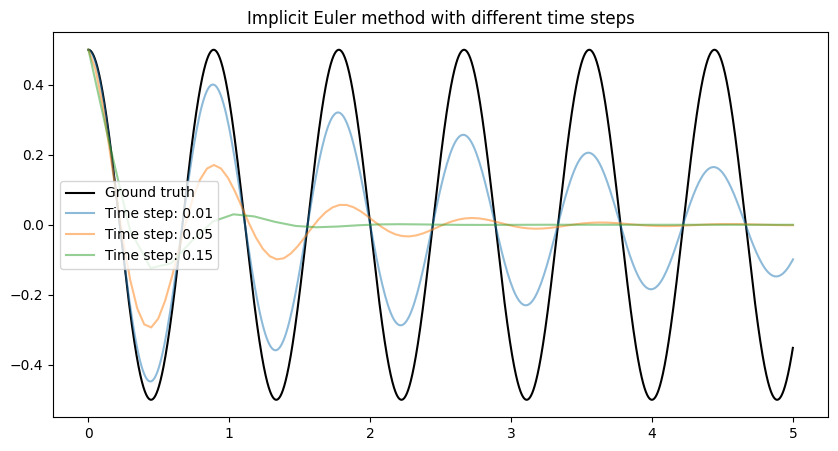

In [3]:
def implicit_euler(time_step, end_time, start_position, start_velocity):
    current_position = start_position
    current_velocity = start_velocity
    positions = [current_position]
    time = 0
    while time < end_time:
        next_velocity = (current_velocity - (time_step * (K_CONSTANT / MASS) * current_position)) / (1 + (time_step * time_step * K_CONSTANT / MASS))
        next_position = (current_position + time_step * current_velocity) / (1 + (time_step * time_step * K_CONSTANT / MASS))
        # next_position = current_position + time_step * next_velocity
        
        current_position = next_position
        current_velocity = next_velocity
        
        time += time_step
        positions.append(current_position)

    return positions


time_steps = [0.01, 0.05, 0.15]

plt.figure(figsize=(10, 5))
plt.plot(time, ground_truth_position, label="Ground truth", color="black")
for time_step in time_steps:
    implicit_euler_positions = implicit_euler(time_step, END_TIME, AMPLITUDE, 0)
    step_count = len(implicit_euler_positions)
    plt.plot(np.linspace(0, END_TIME, step_count), implicit_euler_positions, label=f"Time step: {time_step}", alpha=0.5)

plt.legend()
plt.title("Implicit Euler method with different time steps")

# Explicit Runge-Kutta 4th order Method

The Runge-Kutta method is a more accurate method for solving differential equations. The basic idea is to take multiple steps to calculate the next position and velocity. The most common form is the fourth-order Runge-Kutta method (RK4). The equations are:

$$x_{n+1} = x_n + \frac{\Delta t}{6} (k_1 + 2k_2 + 2k_3 + k_4)$$

Where:

$$k_1 = f(t_n, x_n)$$
$$k_2 = f(t_n + \frac{\Delta t}{2}, x_n + \frac{\Delta t}{2} k_1)$$
$$k_3 = f(t_n + \frac{\Delta t}{2}, x_n + \frac{\Delta t}{2} k_2)$$
$$k_4 = f(t_n + \Delta t, x_n + \Delta t k_3)$$

For the mass-spring system, the equations are:

- $f(t, x) = v$
- $f(t, v) = -\frac{k}{m} x$

Using the RK4 method to approximate the position $x$ and velocity $v$, we have:

$$ x_{i+1} = x_i + \frac{h}{6} (k_{1x} + 2k_{2x} + 2k_{3x} + k_{4x})$$

Where:
 - $ k_{1x} = v_i$
 - $ k_{2x} = v_i + \frac{h}{2} k_{1x} $
 - $ k_{3x} = v_i + \frac{h}{2} k_{2x} $
 - $ k_{4x} = v_i + h k_{3x} $

And for the velocity:
$$ v_{i+1} = v_i + \frac{h}{6} (k_{1v} + 2k_{2v} + 2k_{3v} + k_{4v})$$

 - $ k_{1v} = -\frac{k}{m} x_i $
 - $ k_{2v} = -\frac{k}{m} \left( x_i + \frac{h}{2} k_{1v} \right) $
 - $ k_{3v} = -\frac{k}{m} \left( x_i + \frac{h}{2} k_{2v} \right) $
 - $ k_{4v} = -\frac{k}{m} \left( x_i + h k_{3v} \right) $

Text(0.5, 1.0, 'Explicit Runge-Kutta method with different time steps')

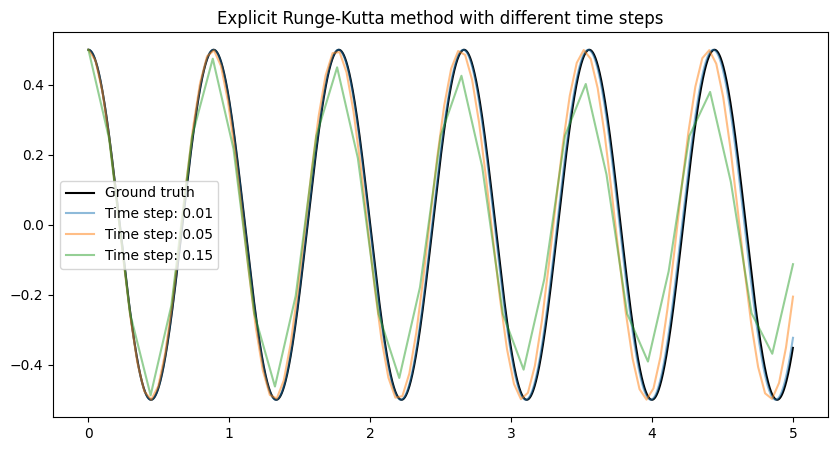

In [4]:
def explicit_runge_kutta_method(time_step, end_time, start_position, start_velocity):
    current_position = start_position
    current_velocity = start_velocity
    positions = [current_position]
    time = 0
    while time < end_time:
        k1x = current_velocity
        k1v = - (K_CONSTANT / MASS) * current_position

        k2x = current_velocity + (time_step / 2) * k1v
        k2v = - (K_CONSTANT / MASS) * (current_position + (time_step / 2) * k1x)
        
        k3x = current_velocity + (time_step / 2) * k2v
        k3v = - (K_CONSTANT / MASS) * (current_position + (time_step / 2) * k2x)

        k4x = current_velocity + time_step * k3v
        k4v = - (K_CONSTANT / MASS) * (current_position + time_step * k3x)

        current_position = current_position + (time_step / 6) * (k1x + 2 * k2x + 2 * k3x + k4x)
        current_velocity = current_velocity + (time_step / 6) * (k1v + 2 * k2v + 2 * k3v + k4v)

        time += time_step
        positions.append(current_position)

    return positions

time_steps = [0.01, 0.05, 0.15]

plt.figure(figsize=(10, 5))
plt.plot(time, ground_truth_position, label="Ground truth", color="black")
for time_step in time_steps:
    implicit_euler_positions = explicit_runge_kutta_method(time_step, END_TIME, AMPLITUDE, 0)
    step_count = len(implicit_euler_positions)
    plt.plot(np.linspace(0, END_TIME, step_count), implicit_euler_positions, label=f"Time step: {time_step}", alpha=0.5)

plt.legend()
plt.title("Explicit Runge-Kutta method with different time steps")

#

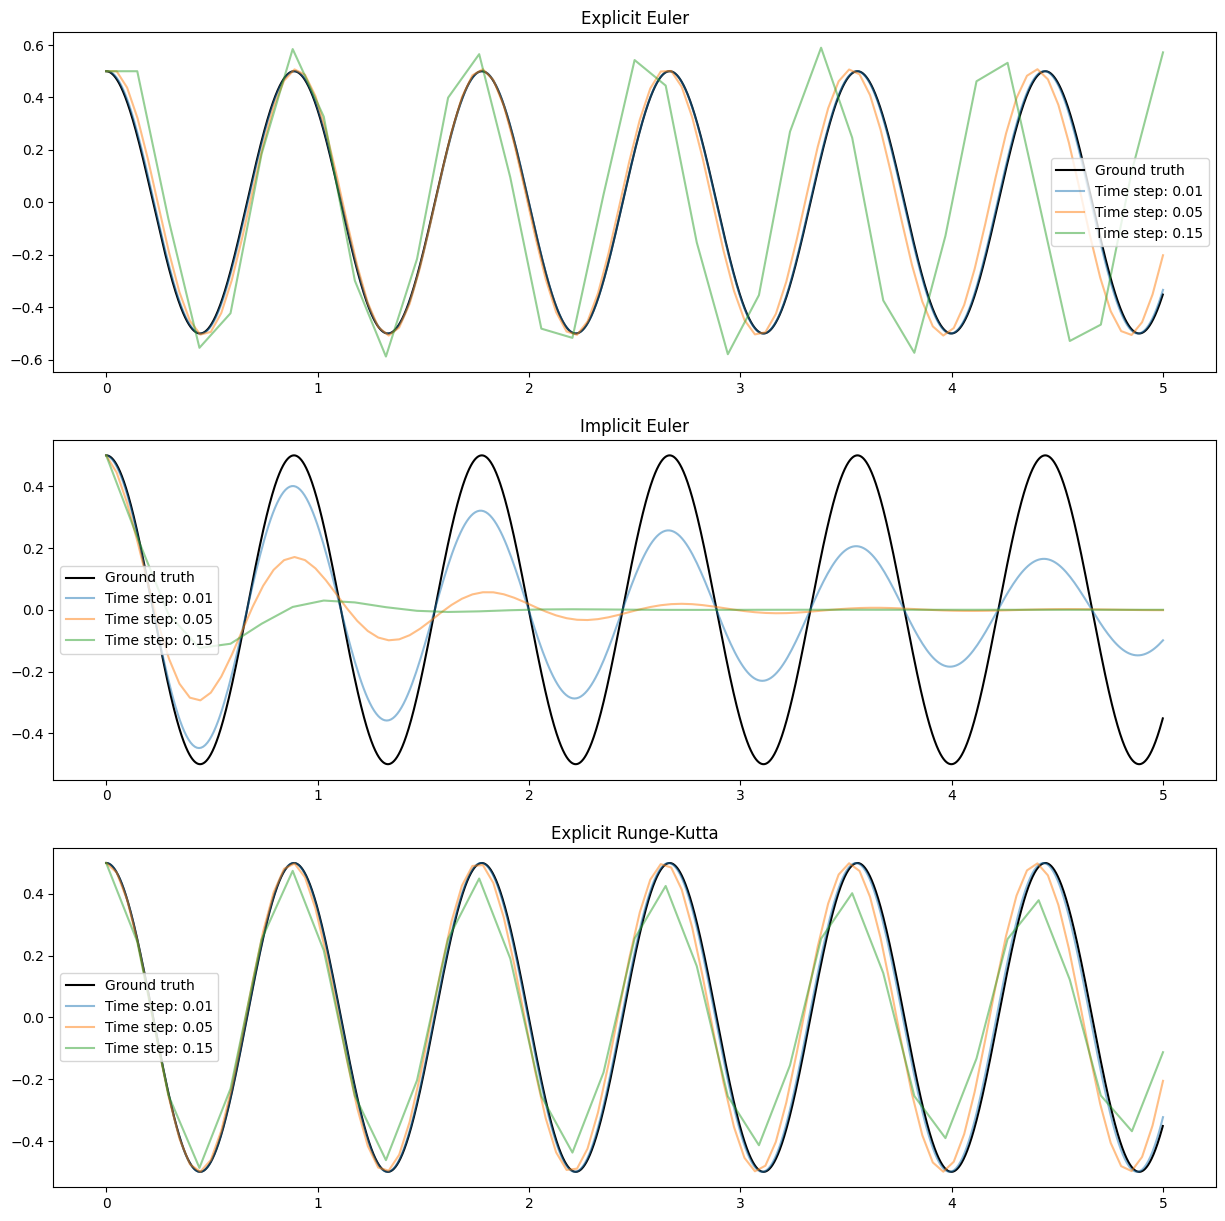

In [5]:
# Plot the differnce between the ground truth and the methods

methods = {
    "Explicit Euler": explicit_euler,
    "Implicit Euler": implicit_euler,
    "Explicit Runge-Kutta": explicit_runge_kutta_method
}

time_steps = [0.01, 0.05, 0.15]

fig, axs = plt.subplots(3, 1, figsize=(15, 15))
for time_step in time_steps:
    for i, (method_name, method) in enumerate(methods.items()):
        if time_step == time_steps[0]:
            axs[i].plot(time, ground_truth_position, label="Ground truth", color="black")
        positions = method(time_step, END_TIME, AMPLITUDE, 0)
        step_count = len(positions)
        axs[i].plot(np.linspace(0, END_TIME, step_count), positions, label=f"Time step: {time_step}", alpha=0.5)
        axs[i].set_title(method_name)
        axs[i].legend()

In [26]:
from tqdm import tqdm
import os

if not os.path.exists("output"):
    os.makedirs("output")

time_steps = np.arange(0, 20, 0.05)

print(len(time_steps))

positions = {
    "Ground Truth": ground_truth(time_steps),
    "Explicit Euler": explicit_euler(0.05, 20, AMPLITUDE, 0),
    "Implicit Euler": implicit_euler(0.05, 20, AMPLITUDE, 0),
    "Explicit Runge-Kutta": explicit_runge_kutta_method(0.05, 20, AMPLITUDE, 0)
}

for j, time_step in tqdm(enumerate(time_steps)):
    fig, axs = plt.subplots(4, 1, figsize=(10, 10))
    for i, (method_name, method_positions) in enumerate(positions.items()):
        axs[i].cla()
        axs[i].set_title(method_name)
        axs[i].set_ylim(-0.2, 0.2)
        axs[i].set_xlim(-0.6, 0.6)

        axs[i].set_xticks([])
        axs[i].set_yticks([])
        axs[i].spines['left'].set_visible(False)
        axs[i].spines['right'].set_visible(False)
        

        axs[i].add_patch(plt.Rectangle((method_positions[j] - 0.05, -0.05), 0.1, 0.1, color="black"))

    fig.savefig(f"output/{j:04d}.png")
    plt.close(fig)

400


400it [00:56,  7.03it/s]


In [1]:
# Using FFMPEG create a video
# Make an intro of just the first frame for 5 seconds
!ffmpeg -y -framerate 0.2 -i output/0000.png -c:v libx264 -r 30 -pix_fmt yuv420p output/intro.mp4
# Run animation
!ffmpeg -y -framerate 15 -i output/%04d.png -c:v libx264 -r 30 -pix_fmt yuv420p output/animation.mp4

# Connect videos
!ffmpeg -y -i output/intro.mp4 -i output/animation.mp4 -filter_complex "[0:v] [1:v] concat=n=2:v=1 [v]" -map "[v]" output/output.mp4

ffmpeg version 6.0-essentials_build-www.gyan.dev Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 12.2.0 (Rev10, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-bzlib --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-mediafoundation --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libvpl --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-lib